In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df=df[['price','sqft_living','bedrooms','bathrooms','floors','grade','condition','yr_built','yr_renovated','waterfront']]
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,3,1955,0.0,NaN
1,538000.0,2570,3,2.25,2.0,7,3,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,3,1933,NaN,0.0
3,604000.0,1960,4,3.00,1.0,7,5,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,3,1987,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,3.0,8,3,2009,0.0,0.0
21593,400000.0,2310,4,2.50,2.0,8,3,2014,0.0,0.0
21594,402101.0,1020,2,0.75,2.0,7,3,2009,0.0,0.0
21595,400000.0,1600,3,2.50,2.0,8,3,2004,0.0,NaN


In [5]:
df.isnull().sum()

price              0
sqft_living        0
bedrooms           0
bathrooms          0
floors             0
grade              0
condition          0
yr_built           0
yr_renovated    3842
waterfront      2376
dtype: int64

In [6]:
df['waterfront'] = df['waterfront'].fillna(0)

In [7]:
df.isnull().sum()
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

price           0
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
grade           0
condition       0
yr_built        0
yr_renovated    0
waterfront      0
dtype: int64

In [8]:
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [9]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_renovated,waterfront,age
0,221900.0,1180,3,1.00,1.0,7,3,0.0,0.0,60
1,538000.0,2570,3,2.25,2.0,7,3,1991.0,0.0,64
2,180000.0,770,2,1.00,1.0,6,3,0.0,0.0,82
3,604000.0,1960,4,3.00,1.0,7,5,0.0,0.0,50
4,510000.0,1680,3,2.00,1.0,8,3,0.0,0.0,28


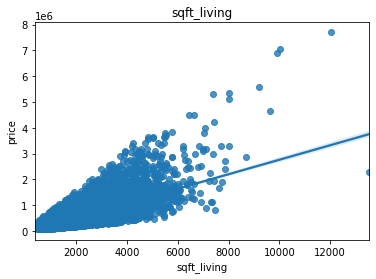

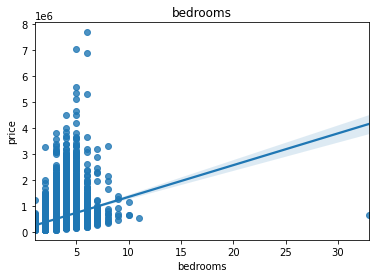

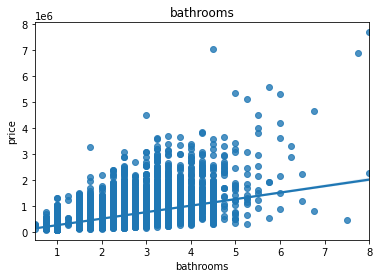

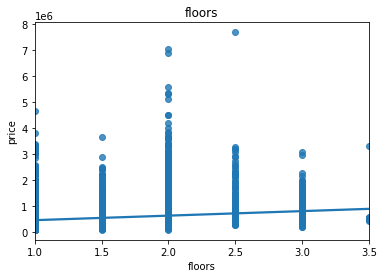

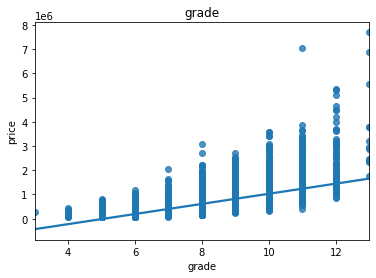

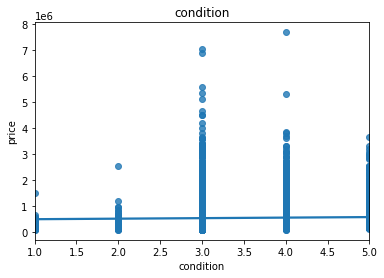

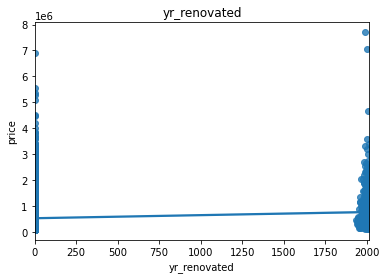

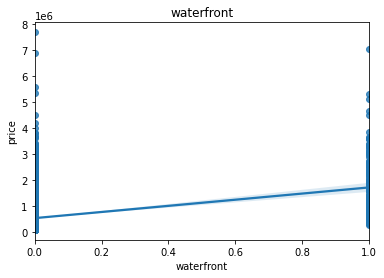

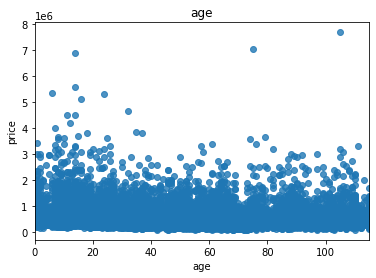

In [10]:
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1,1)
    sns.regplot(X[col], df.price)
    plt.title(col);

In [11]:
cor = df.corr()
cor

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_renovated,waterfront,age
price,1.000000,0.701917,0.308787,0.525906,0.256804,0.667951,0.036056,0.117855,0.264306,-0.053953
sqft_living,0.701917,1.000000,0.578212,0.755758,0.353953,0.762779,-0.059445,0.051060,0.104637,-0.318152
bedrooms,0.308787,0.578212,1.000000,0.514508,0.177944,0.356563,0.026496,0.017900,-0.002127,-0.155670
bathrooms,0.525906,0.755758,0.514508,1.000000,0.502582,0.665838,-0.126479,0.047177,0.063629,-0.507173
floors,0.256804,0.353953,0.177944,0.502582,1.000000,0.458794,-0.264075,0.003793,0.020797,-0.489193
grade,0.667951,0.762779,0.356563,0.665838,0.458794,1.000000,-0.146896,0.015623,0.082818,-0.447865
condition,0.036056,-0.059445,0.026496,-0.126479,-0.264075,-0.146896,1.000000,-0.055808,0.016648,0.361592
yr_renovated,0.117855,0.051060,0.017900,0.047177,0.003793,0.015623,-0.055808,1.000000,0.073939,0.202555
waterfront,0.264306,0.104637,-0.002127,0.063629,0.020797,0.082818,0.016648,0.073939,1.000000,0.024487
age,-0.053953,-0.318152,-0.155670,-0.507173,-0.489193,-0.447865,0.361592,0.202555,0.024487,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

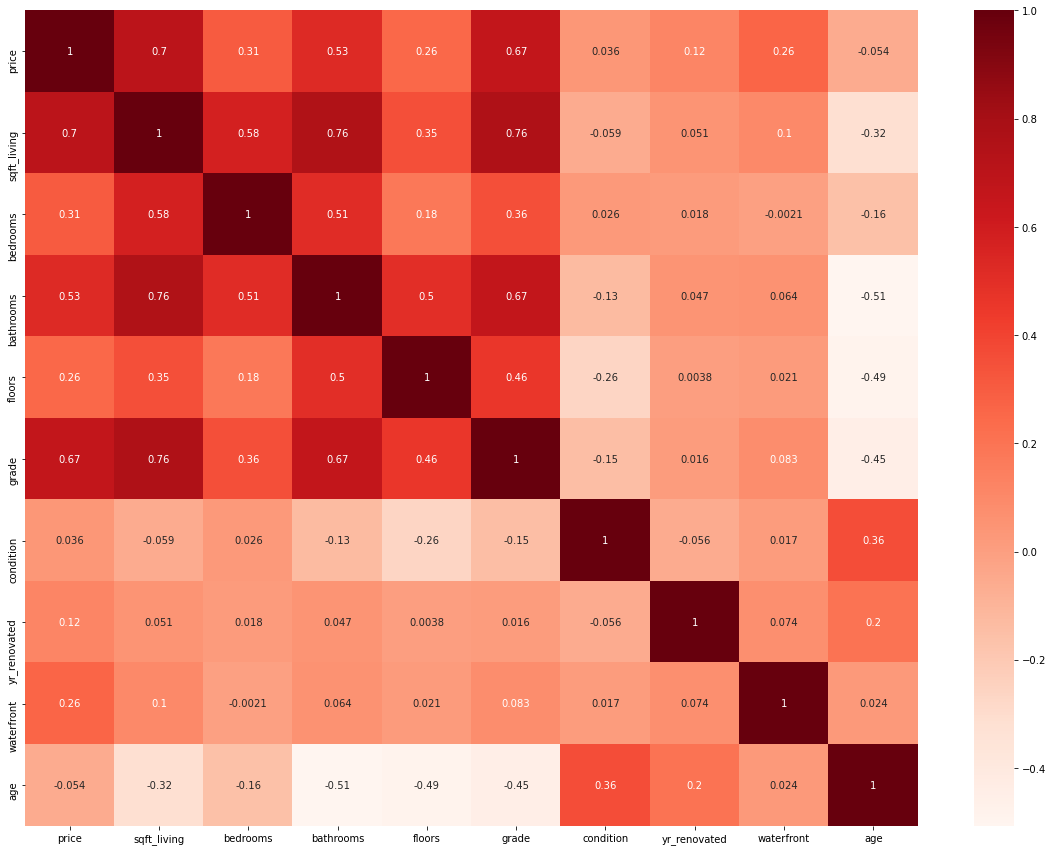

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show

## Model 1

In [13]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [14]:
train, test = train_test_split(df)

In [15]:
print(len(train), len(test))
train.head()

16197 5400


,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_renovated,waterfront,age
12728,550000.0,1630,3,1.00,1.0,8,4,0.0,0.0,61
19168,350000.0,1440,3,2.00,1.0,8,3,0.0,0.0,27
11115,725000.0,2810,3,2.50,2.0,8,3,0.0,0.0,14
4084,499500.0,2970,3,2.50,2.0,9,3,0.0,0.0,17
4389,353000.0,2200,4,2.75,1.0,7,3,0.0,0.0,26


In [16]:
test.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_renovated,waterfront,age
19883,380000.0,1550,3,2.25,3.0,8,3,0.0,0.0,4
9604,730000.0,3280,6,2.75,1.0,7,4,0.0,0.0,52
18155,791000.0,2344,5,1.75,1.5,7,4,0.0,0.0,94
4150,631000.0,1670,3,2.25,2.0,9,3,0.0,0.0,0
1033,768000.0,3220,3,2.50,2.0,9,4,0.0,0.0,34


In [17]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4360.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        07:30:18   Log-Likelihood:            -2.9620e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.061e+06   1.74e+04    -61.108      0.000   -1.09e+06   -1.03e+06
sqft_living    173.7648      3.263     53.260      0.000     167.370     180.160
bedrooms     -4.129e+04   2046.525    -20.174      0.000   -4.53e+04   -3.73e+04
bathrooms     5.023e+04   3481.867     14.425      0.000    4.34e+04    5.71e+04
floors        2.198e+04   3458.422      6.356      0.000    1.52e+04    2.88e+04
grade         1.303e+05   2157.327     60.399      0.000    1.26e+05    1.35e+05
condition     2.022e+04   2517.944      8.029      0.000    1.53e+04    2.52e+04
yr_renovated    14.1925      4.313      3.291      0.001       5.739      22.646
waterfront    7.521e+05   1.84e+04     40.867      0.000    7.16e+05    7.88e+05
age           3796.6367     69.852     54.352      0.000    3659.721    3933.552
==============================================================================
Omnibus:                    15924.544   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1029161.841
Skew:                           2.953   Prob(JB):                         0.00
Kurtosis:                      36.298   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

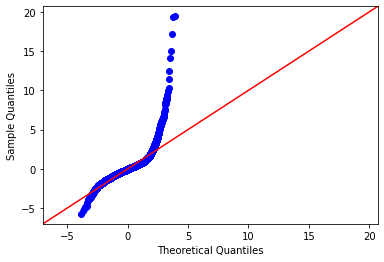

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

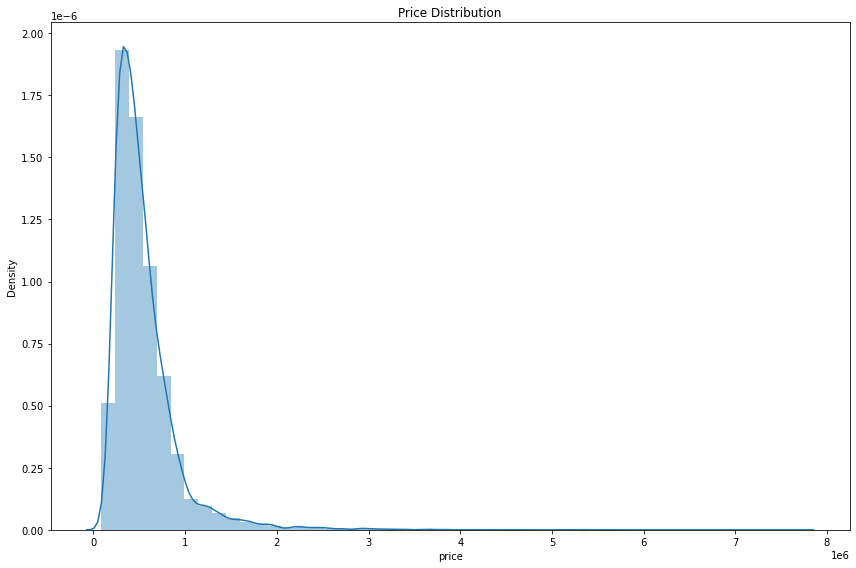

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

In [20]:
df = df[df['price'] <= 900000]

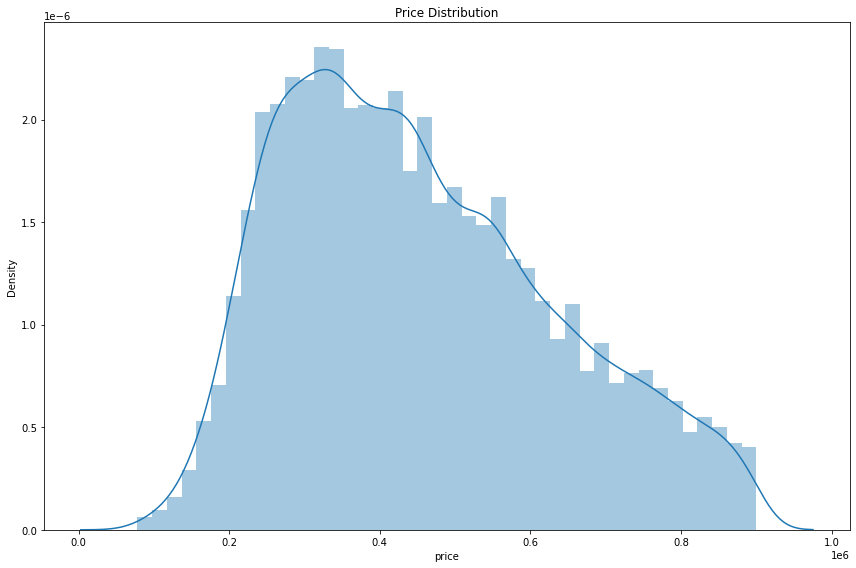

In [21]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19564 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19564 non-null  float64
 1   sqft_living   19564 non-null  int64  
 2   bedrooms      19564 non-null  int64  
 3   bathrooms     19564 non-null  float64
 4   floors        19564 non-null  float64
 5   grade         19564 non-null  int64  
 6   condition     19564 non-null  int64  
 7   yr_renovated  19564 non-null  float64
 8   waterfront    19564 non-null  float64
 9   age           19564 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [23]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [24]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2250.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        07:30:19   Log-Likelihood:            -2.5762e+05
No. Observations:               19564   AIC:                         5.153e+05
Df Residuals:                   19554   BIC:                         5.153e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.046e+05   1.14e+04    -53.109      0.000   -6.27e+05   -5.82e+05
sqft_living     78.5139      2.210     35.523      0.000      74.182      82.846
bedrooms     -1.347e+04   1280.936    -10.514      0.000    -1.6e+04    -1.1e+04
bathrooms     2.783e+04   2201.055     12.646      0.000    2.35e+04    3.21e+04
floors        3.578e+04   2135.518     16.756      0.000    3.16e+04       4e+04
grade         9.171e+04   1404.621     65.295      0.000     8.9e+04    9.45e+04
condition     1.495e+04   1534.796      9.739      0.000    1.19e+04     1.8e+04
yr_renovated     0.6706      2.832      0.237      0.813      -4.880       6.222
waterfront    1.366e+05   2.01e+04      6.797      0.000    9.72e+04    1.76e+05
age           2433.8874     44.553     54.629      0.000    2346.560    2521.215
==============================================================================
Omnibus:                      289.922   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.044
Skew:                           0.281   Prob(JB):                     4.73e-68
Kurtosis:                       3.256   Cond. No.                     4.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

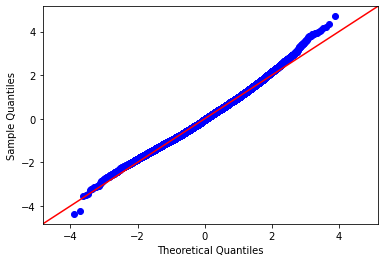

In [25]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)